# SAM

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

In [2]:
checkpoint_path = 'checkpoint/sam_vit_h_4b8939.pth'
img_path = 'depositphotos_51536413-stock-photo-dog-and-cat-together.jpeg'

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [5]:
print(img_path)

depositphotos_51536413-stock-photo-dog-and-cat-together.jpeg


In [6]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

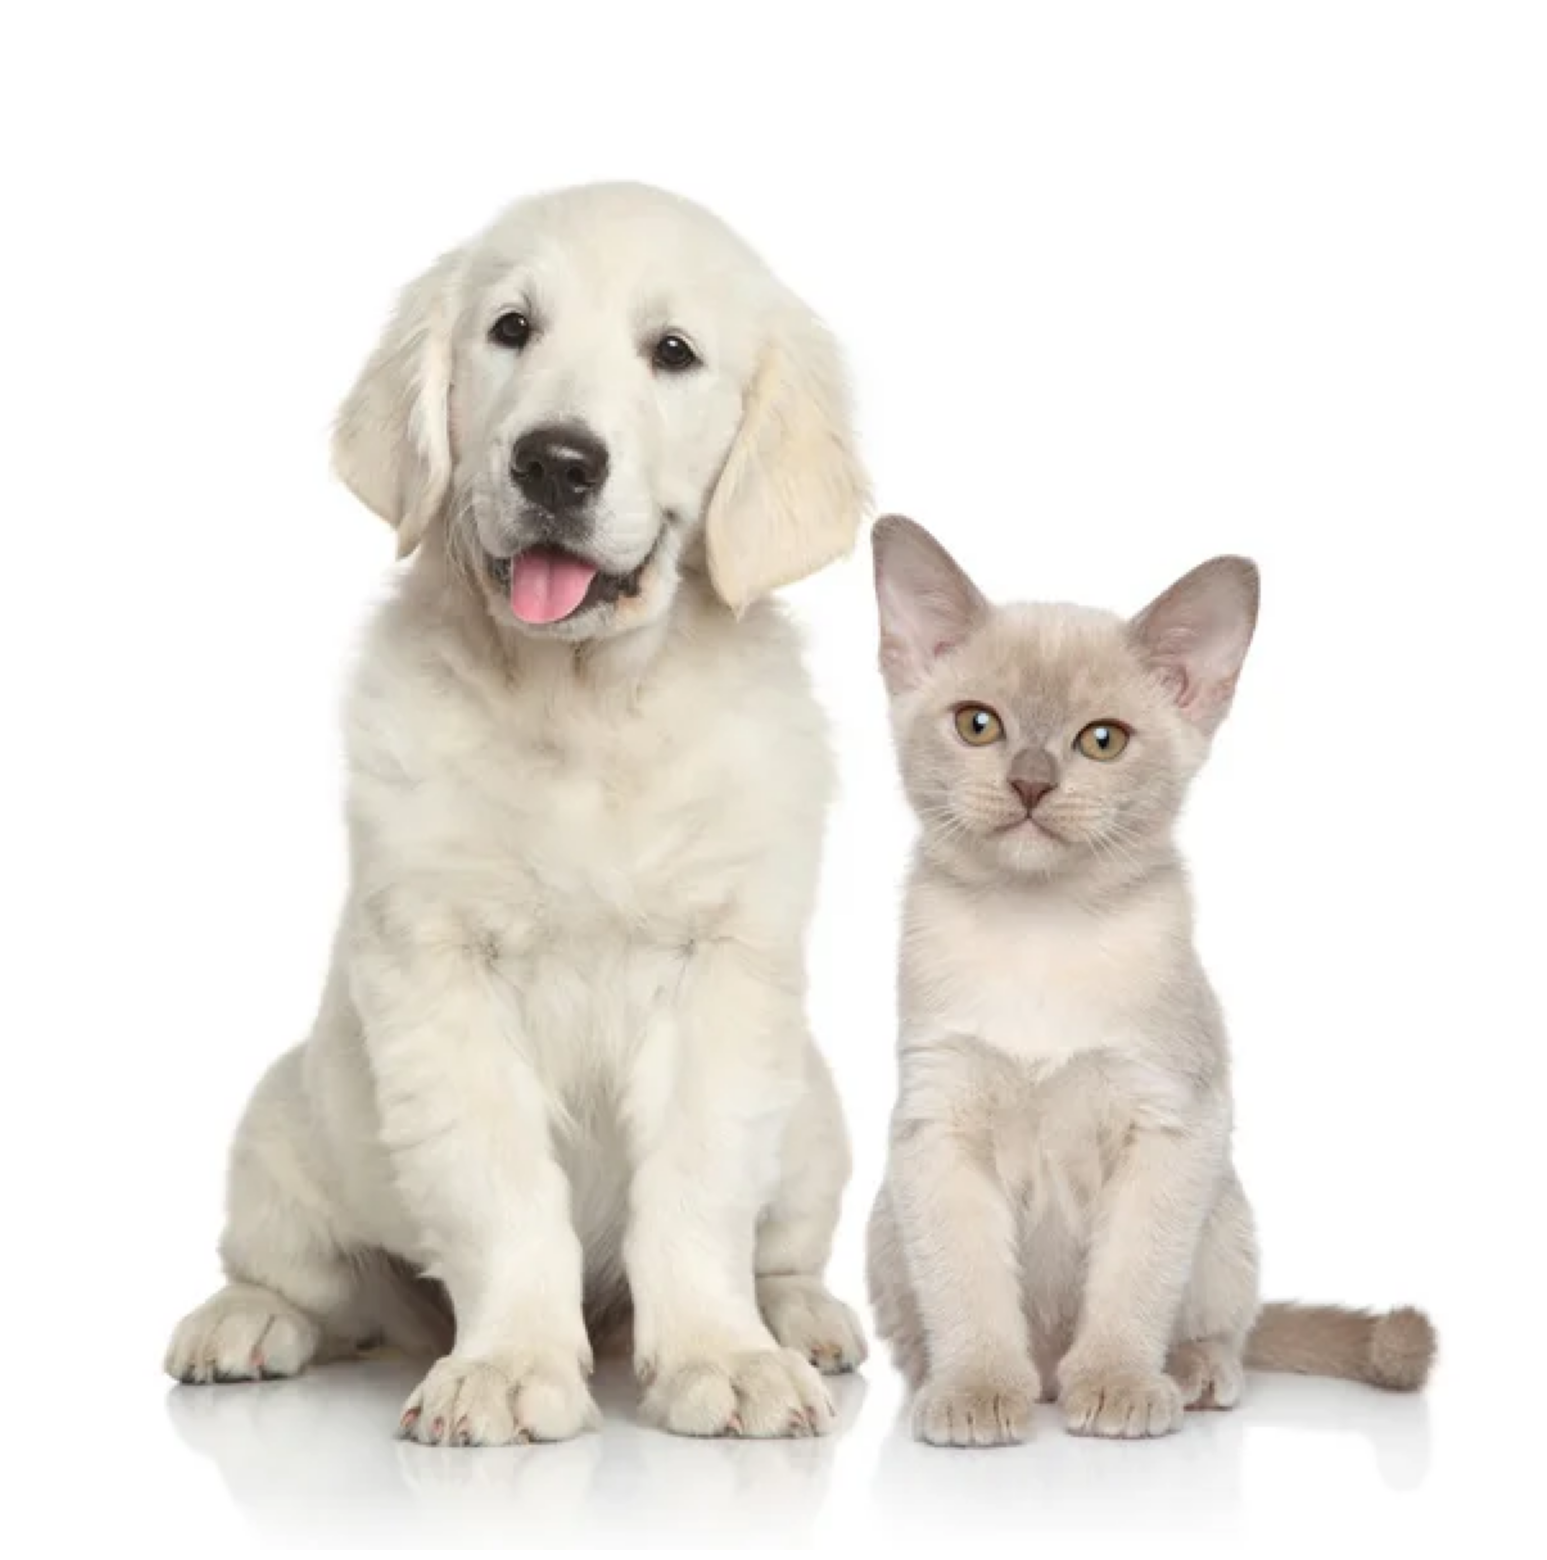

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [9]:
image
masks = mask_generator.generate(image)

In [10]:
print(len(masks))
print(masks[0].keys())

32
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


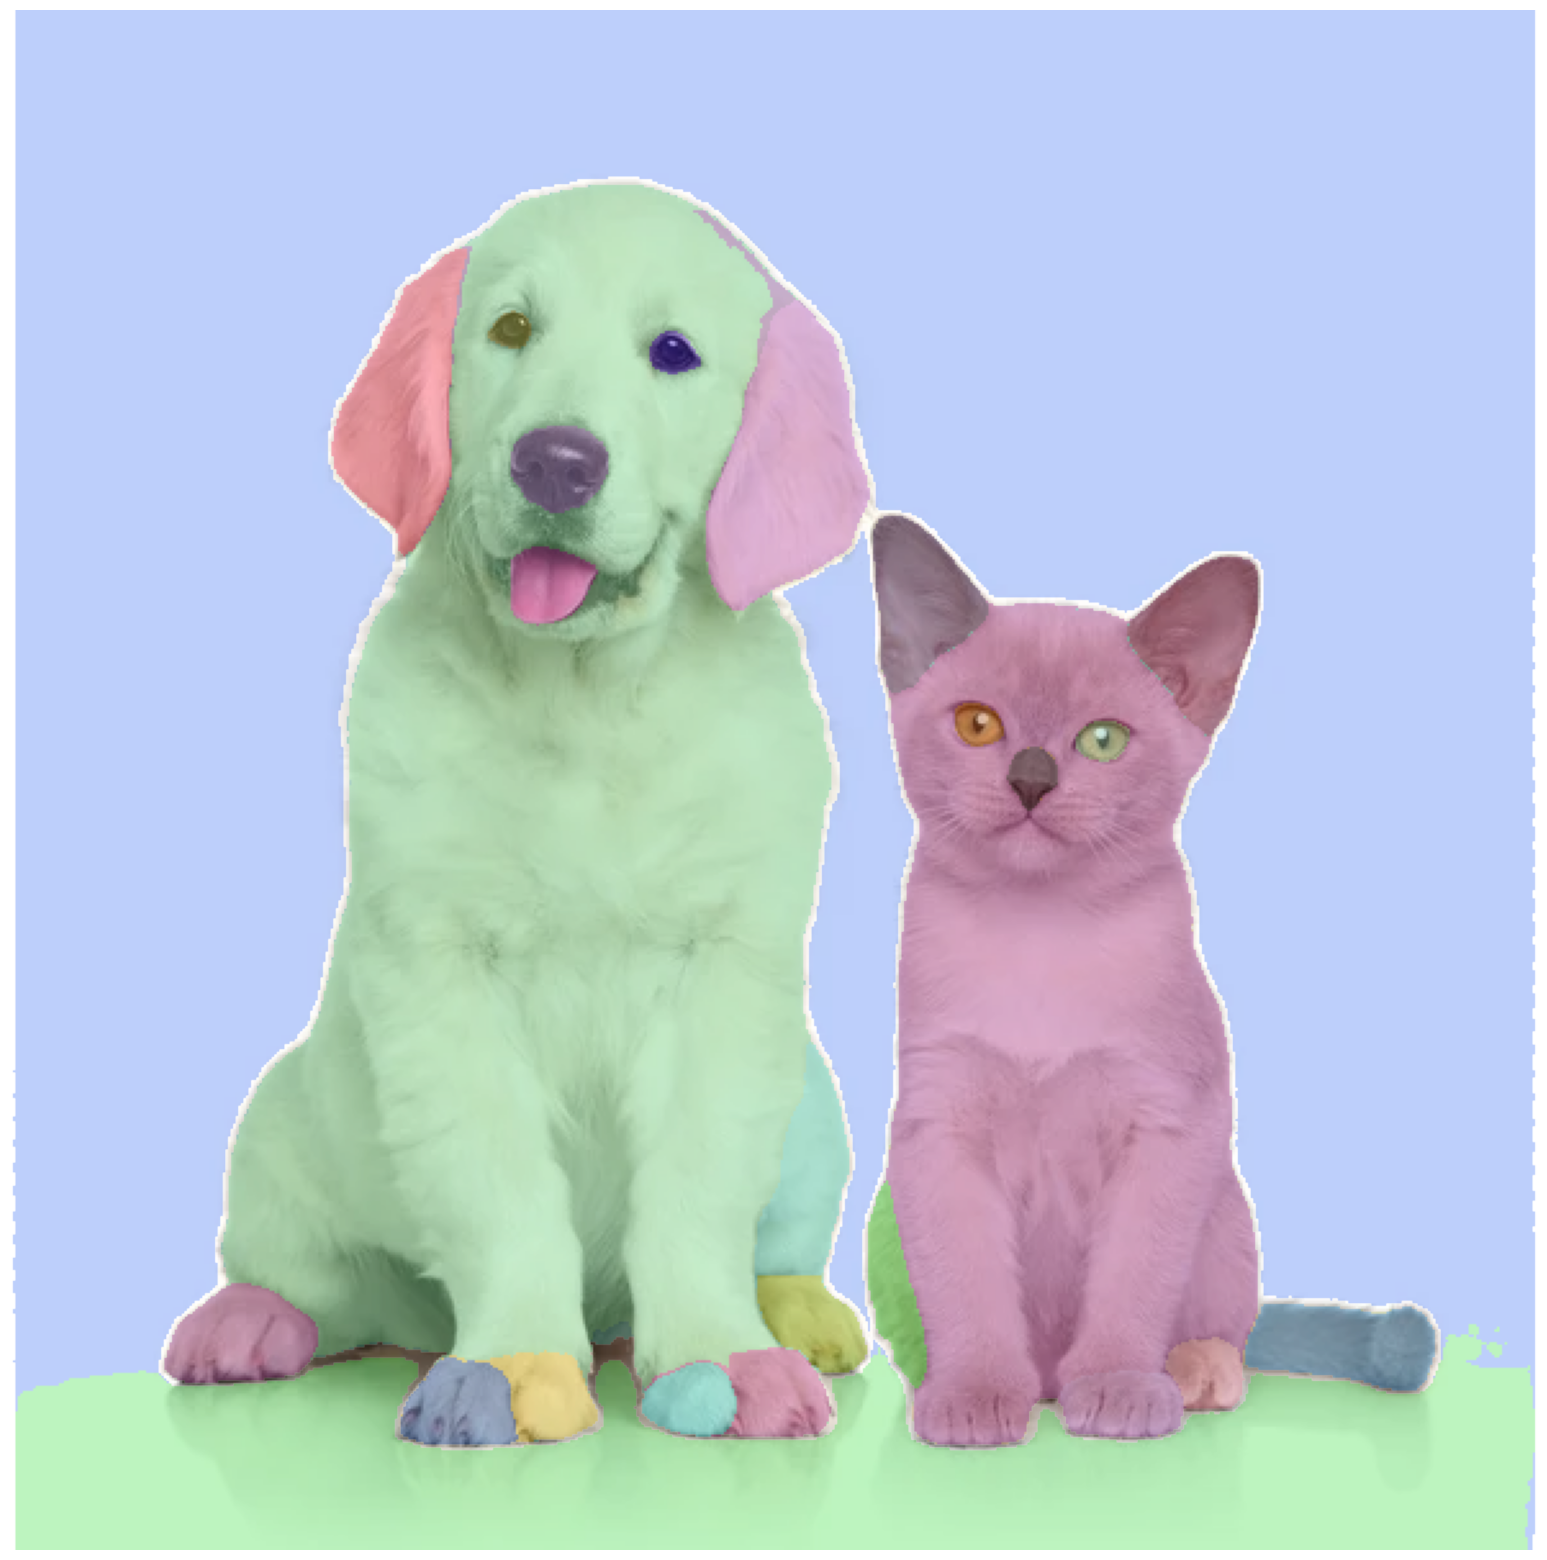

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

## Data visualisation

In [ ]:
from rasterio.plot import show
import rasterio

def read_rasterio(fp):
    img = rasterio.open(fp)
    return img
    

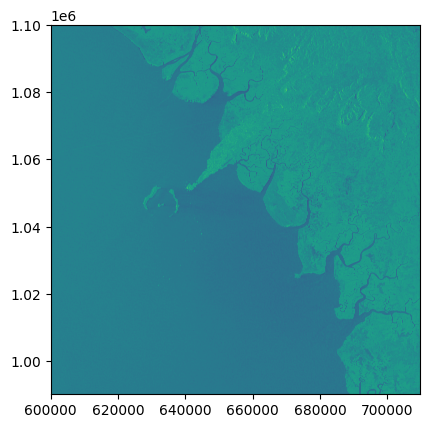

<Axes: >

In [21]:
# visualize the masks tif 
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import os 

import rasterio
from rasterio.plot import show

fig, ax = plt.subplots(1, figsize=(12, 12))
show((src, 1), cmap='Greys_r', interpolation='none', ax=ax)

def read_tif_image(tif_path):
    img = Image.open(tif_path)
    img = np.array(img)
    return img

sat_dir = "part1/9"
fig,ax = plt.subplots(2,3,figsize=(10,10))
i=0

for path in os.listdir(sat_dir):
    if "s1" in path or "s2" in path:
        if 'img' in path:
            img = rasterio.open(fp)
            show(img)

        img = read_tif_image(os.path.join(sat_dir, path))
        ax[i//3][i%3].imshow(img, cmap='gray')
        ax[i//3][i%3].axis('off')
        i+=1

In [22]:
type(img)

rasterio.io.DatasetReader